In [6]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [37]:
plt.rc('font', size=18, weight='bold', family='sans-serif')
plt.rc('axes', titlesize=18)#, labelsize=18)                                                                                 
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=18)
plt.rc('figure', titlesize=18)

In [8]:
name = "HPK"
vendor = "Vendor 1"

#name = "QPT"
#vendor = "Vendor 2"

outdir = name+"-plots"

In [9]:
# Pixel plots
allpix = pd.read_csv(name+"-plots/allpix.csv")
allpix_bad = pd.read_csv(name+"-plots/allpix_bad.csv")

npix = len(allpix["pa"])
print(npix)

logmax = npix*50

1289504


In [16]:
edges1 = allpix[allpix.index%118 == 0]
edges2 = allpix[allpix.index%118 == 117]
edgepix = pd.concat([edges1,edges2])

centerpix = allpix[(allpix.index%118 > 0) & (allpix.index%118 < 117)]

print(edgepix.shape,centerpix.shape)

((21856, 23), (1267648, 23))


In [40]:
def pixel_overlay(var, xtitle, names, bins):

    arr1 = np.clip(edgepix[var],bins[0],bins[-1])
    arr2 = np.clip(centerpix[var],bins[0],bins[-1])

    mu1 = np.mean(arr1)
    sigma1 = np.std(arr1)
    mu2 = np.mean(arr2)
    sigma2 = np.std(arr2)

    fig1 = plt.figure(figsize=(8,6))
    plt.hist(arr1,bins=bins,histtype='step',color='black')
    plt.hist(arr2,bins=bins,histtype='step',color='green')
    plt.xlabel(xtitle,fontweight='bold')
    plt.ylabel("Pixels",fontweight='bold')
    plt.title(vendor +" MaPSAs",fontweight='bold')
    plt.legend(names,frameon=False)
    
    plt.figtext(.65,.7,"$\mu$="+str(round(mu1,2))+", $\sigma$="+str(round(sigma1,2)),size=18)
    plt.figtext(.65,.65,"$\mu$="+str(round(mu2,2))+", $\sigma$="+str(round(sigma2,2)),color='green',size=18)

    plt.tight_layout()
    
    plt.savefig(outdir+"/"+var+"_edges.png",bbox_inches='tight')
    plt.savefig(outdir+"/"+var+"_edges.pdf",bbox_inches='tight')
    
    plt.yscale('log')
    plt.savefig(outdir+"/"+var+"_edges_log.png",bbox_inches='tight')
    plt.savefig(outdir+"/"+var+"_edges_log.pdf",bbox_inches='tight')

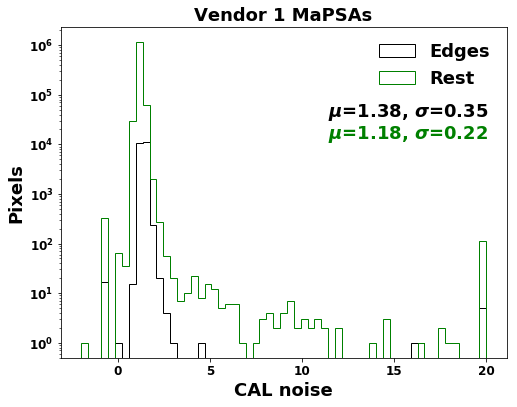

In [41]:
pixel_overlay("CAL_RMS", "CAL noise", ["Edges","Rest"], np.linspace(-2,20,60))

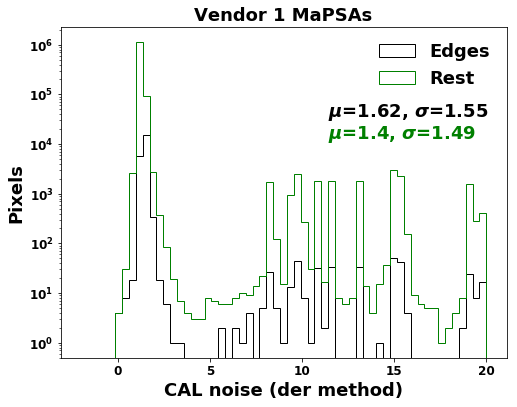

In [42]:
pixel_overlay("CAL_RMS_DER", "CAL noise (der method)", ["Edges","Rest"], np.linspace(-2,20,60))

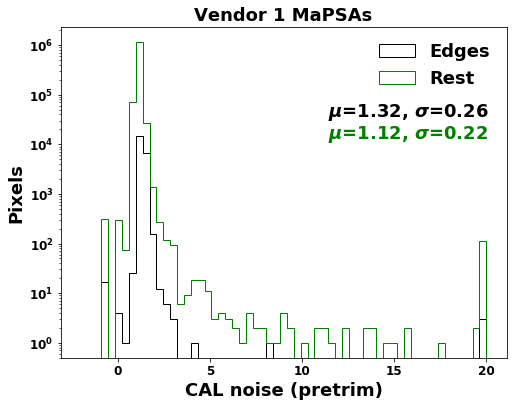

In [43]:
pixel_overlay("CAL_RMS_pretrim", "CAL noise (pretrim)", ["Edges","Rest"], np.linspace(-2,20,60))

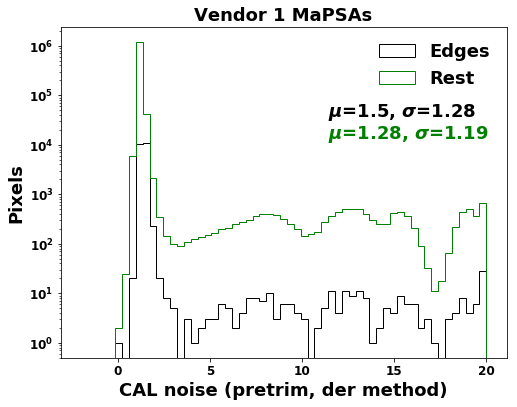

In [44]:
pixel_overlay("CAL_RMS_pretrim_DER", "CAL noise (pretrim, der method)", ["Edges","Rest"], np.linspace(-2,20,60))

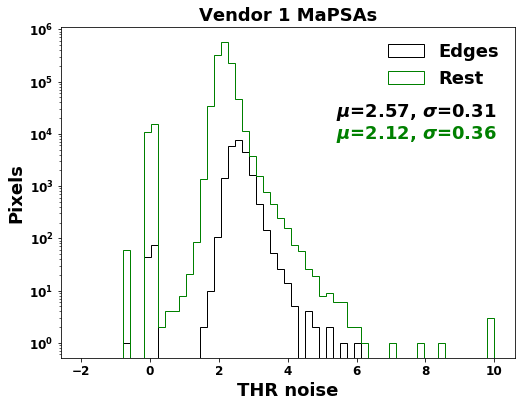

In [45]:
pixel_overlay("THR_RMS", "THR noise", ["Edges","Rest"], np.linspace(-2,10,60))

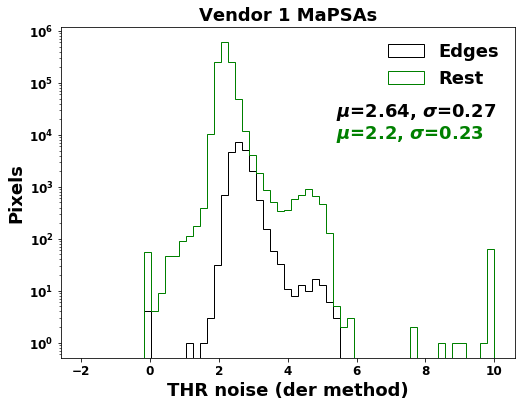

In [47]:
pixel_overlay("THR_RMS_DER", "THR noise (der method)", ["Edges","Rest"], np.linspace(-2,10,60))

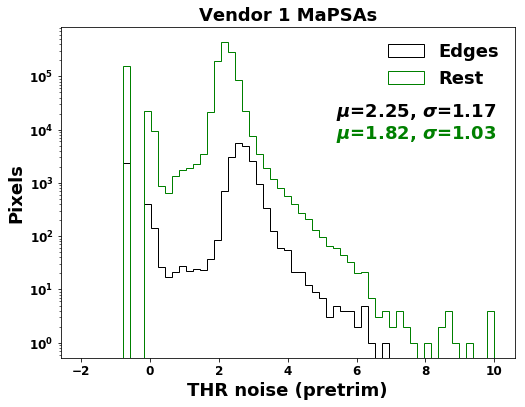

In [46]:
pixel_overlay("THR_RMS_pretrim", "THR noise (pretrim)", ["Edges","Rest"], np.linspace(-2,10,60))

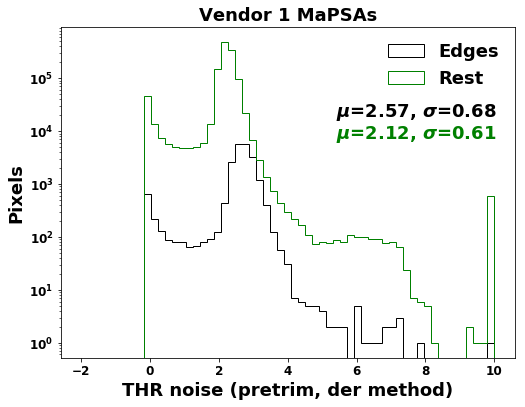

In [48]:
pixel_overlay("THR_RMS_pretrim_DER", "THR noise (pretrim, der method)", ["Edges","Rest"], np.linspace(-2,10,60))

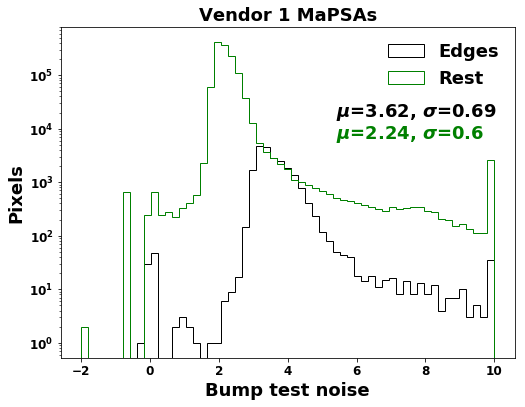

In [49]:
pixel_overlay("Bump_RMS", "Bump test noise", ["Edges","Rest"], np.linspace(-2,10,60))

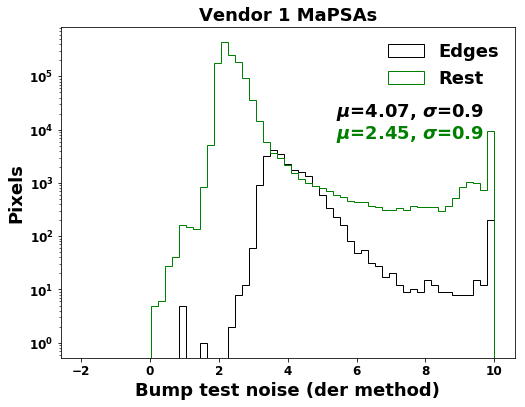

In [50]:
pixel_overlay("Bump_RMS_DER", "Bump test noise (der method)", ["Edges","Rest"], np.linspace(-2,10,60))